# Dense-NN to predict individual salary - Final Project

The goal with this project is to experiment with a variety of different features and models to try and accurately predict if an individual's salary is over 50k/year. I will primarily be using a Dense-NN utilizing binary crossentropy to classify individuals as having a higher or lower salary than 50k/year.

# Pre-reqs

In [ ]:
pip install numpy


In [ ]:
!pip install mastml

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from mastml.mastml import Mastml
from mastml.preprocessing import SklearnPreprocessor
from mastml.models import SklearnModel
from mastml.data_splitters import SklearnDataSplitter
import matplotlib.pyplot as plt

scikit-lego is an optional dependency, enabling use of the LowessRegression model. If you want to use this model, do "pip install scikit-lego"
linear-tree is an optional dependency, enabling use of Linear tree, forest, and boosting models. If you want to use this model, do "pip install linear-tree"
gplearn is an optional dependency, enabling the use of genetic programming SymbolicRegressor model. If you want to use this model, do "pip install gplearn"


In [ ]:
SAVEPATH = 'drive/MyDrive/ML4ER/Final_Project'

# the Mastml call here is initializing the Mastml object
mastml = Mastml(savepath=SAVEPATH)
# the get_savepath method generates the output folder specified above
savepath = mastml.get_savepath

drive/MyDrive/ML4ER/Final_Project not empty. Renaming...


# Constructing simplified model

In this variation, we will only be using age to predict if an individual's salary is over 50k and compare our results to more advanced models later. Not much data cleaning is necessary in this segment since we only have two features in a quality dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/ML4ER/adult.csv')


df['over 50k'] = df['income'].str.contains(">50K").astype(int)

df = df[['age', 'over 50k']]

df

,age,over 50k
0,90,0
1,82,0
2,66,0
3,54,0
4,41,0
...,...,...
32556,22,0
32557,27,0
32558,40,1
32559,58,0


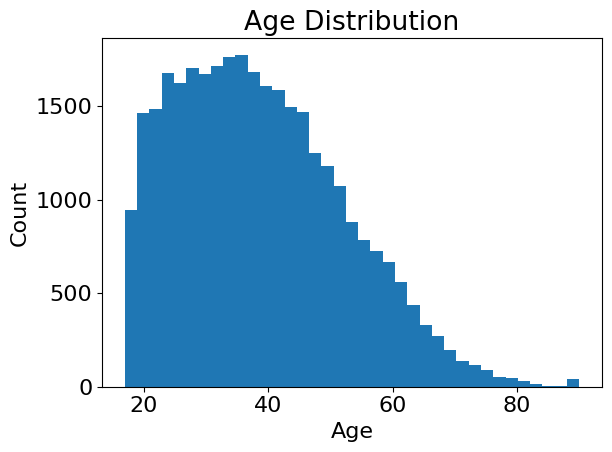

In [ ]:
plt.hist(df['age'], bins=37)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

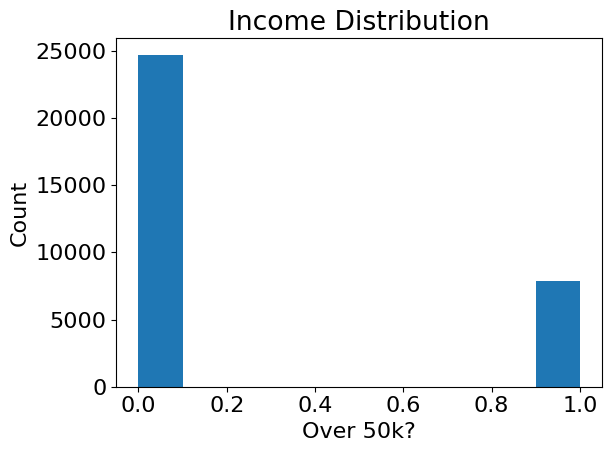

In [ ]:
plt.hist(df['over 50k'])
plt.xlabel('Over 50k?')
plt.ylabel('Count')
plt.title('Income Distribution')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop(columns=['over 50k'])
y = df['over 50k']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

#Making our model

In [ ]:
import os
import shutil
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

import tensorflow
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import SGD, Adam

In [ ]:
model_dense = Sequential()
model_dense.add(tensorflow.keras.Input(shape=(1,)))
model_dense.add(Dense(units=8, activation='relu'))
model_dense.add(Dense(units=4, activation='relu'))
model_dense.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model_dense.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

compile the network, using the Adam optimizer and categorical crossentropy as a loss function,

In [ ]:
model_dense.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_folder = 'dense_1layer'
checkpoint_file_fcn = os.path.join(SAVEPATH, model_folder,'checkpoint.model.keras')
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
mcp_save = ModelCheckpoint(checkpoint_file_fcn, save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, verbose=1, min_delta=1e-5, mode='max')

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)


class_weights_dict = {0: class_weights[0], 1: class_weights[1]}


history_dense = model_dense.fit(X_train,
                                y_train,
                                epochs=50,
                                verbose=1,
                                class_weight = class_weights_dict,
                                batch_size=16,
                                steps_per_epoch=None,
                                validation_data=(X_val, y_val),
                                callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

Epoch 1/50
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5345 - loss: 1.0645 - val_accuracy: 0.2349 - val_loss: 0.7446 - learning_rate: 1.0000e-04
Epoch 2/50
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2465 - loss: 0.6849 - val_accuracy: 0.2680 - val_loss: 0.7452 - learning_rate: 1.0000e-04
Epoch 3/50
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4485 - loss: 0.6800 - val_accuracy: 0.4995 - val_loss: 0.7192 - learning_rate: 1.0000e-04
Epoch 4/50
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5278 - loss: 0.6754 - val_accuracy: 0.5517 - val_loss: 0.7032 - learning_rate: 1.0000e-04
Epoch 5/50
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5729 - loss: 0.6702 - val_accuracy: 0.6162 - val_loss: 0.6799 - learning_rate: 1.0000e-04
Epoch 6/50
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6072 - loss: 0.6608 - val_accuracy: 0.6091 - val_loss: 0.6851 - learning_rate: 1.0000e-04
Epoch 7/50
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/ste

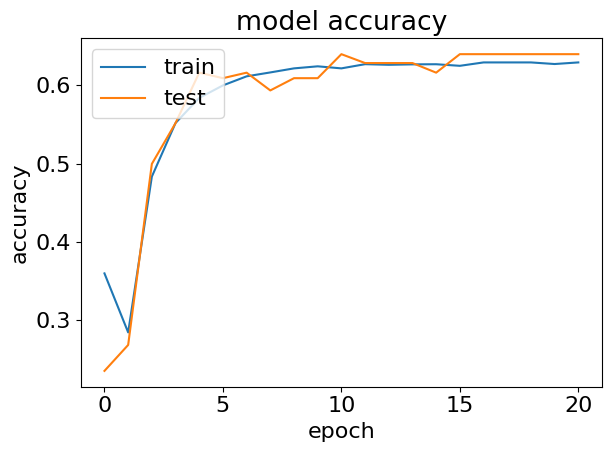

In [ ]:
os.makedirs(model_folder, exist_ok=True)
plt.plot(history_dense.history['accuracy'])
plt.plot(history_dense.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(os.path.join(model_folder, 'model_dense_training.png'), dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
model_dense_best = keras.models.load_model(checkpoint_file_fcn)

preds = model_dense_best.predict(X_val)
y_true = y_val.values.ravel()
y_pred_dense = (preds > 0.5).astype(int).ravel()

model_dense_acc = accuracy_score(y_true, y_pred_dense)
print('Validation accuracy=', model_dense_acc)

p_r_f1 = precision_recall_fscore_support(y_true, y_pred_dense, labels=[0, 1])  # Changed labels
print('F1 scores:')
print('Average F1 score = ', np.mean([p_r_f1[2][0], p_r_f1[2][1]]))  # Adjusted for two labels

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation accuracy= 0.6398526251151366
F1 scores:
Average F1 score =  0.5955457171395405


# Adjusted model

The adjusted model introduces the 11 other features initially ignored in the simplified model, this is in hopes of increasing F1 score

In [ ]:
new_df = pd.read_csv('/content/drive/My Drive/ML4ER/adult.csv')

new_df['over 50k'] = new_df['income'].str.contains(">50K").astype(int)

new_df = new_df.drop(columns=['capital.gain', 'native.country', 'income'])

new_df = new_df[~new_df.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)]

new_df


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,over 50k
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,4356,18,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,3900,40,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,3900,40,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,3770,45,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,3770,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,40,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,38,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,40,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,40,0


In [87]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


y_adjusted = new_df['over 50k']
X_adjusted = new_df.drop(columns=['over 50k'])


categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
numerical_features = ['age', 'fnlwgt', 'education.num', 'capital.loss', 'hours.per.week']


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


numerical_pipeline = Pipeline([('scaler', StandardScaler())])
categorical_pipeline = Pipeline([('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)],
    remainder='drop')


X_processed = preprocessor.fit_transform(X_adjusted)

X_processed = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out(), index=X_adjusted.index)


X_train, X_val, y_train, y_val = train_test_split(X_processed, y_adjusted, test_size=0.1, random_state=42)

In [88]:

model_dense_adjusted = Sequential()
model_dense_adjusted.add(tf.keras.Input(shape=(X_train.shape[1],)))
model_dense_adjusted.add(Dense(units=64, activation='relu'))
model_dense_adjusted.add(Dense(units=32, activation='relu'))
model_dense_adjusted.add(Dense(units=16, activation='relu'))
model_dense_adjusted.add(Dense(units=1, activation='sigmoid'))


model_dense_adjusted.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


In [89]:
model_dense_adjusted.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 64)             │         4,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,657 (26.00 KB)

 Trainable params: 6,657 (26.00 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
from tensorflow.keras.optimizers import AdamW
model_dense_adjusted.compile(optimizer=AdamW(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

In [91]:
model_folder = 'dense_1layer_adjusted'
checkpoint_file_fcn = os.path.join(SAVEPATH, model_folder,'checkpoint.model.keras')
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
mcp_save = ModelCheckpoint(checkpoint_file_fcn, save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr_loss = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.1,
    patience=5,
    verbose=1,
    min_delta=1e-4,
    min_lr=1e-5,
    mode='max'
)

In [92]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)


class_weights_dict = {0: class_weights[0], 1: class_weights[1]}


history_dense_adjusted = model_dense_adjusted.fit(X_train,
                                y_train,
                                epochs=50,
                                verbose=1,
                                class_weight = class_weights_dict,
                                batch_size=16,
                                steps_per_epoch=None,
                                validation_data=(X_val, y_val),
                                callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

Epoch 1/50
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7805 - loss: 0.4451 - val_accuracy: 0.8096 - val_loss: 0.3854 - learning_rate: 0.0010
Epoch 2/50
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7949 - loss: 0.4022 - val_accuracy: 0.7777 - val_loss: 0.4453 - learning_rate: 0.0010
Epoch 3/50
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7981 - loss: 0.4026 - val_accuracy: 0.8021 - val_loss: 0.3969 - learning_rate: 0.0010
Epoch 4/50
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7995 - loss: 0.3946 - val_accuracy: 0.8014 - val_loss: 0.3985 - learning_rate: 0.0010
Epoch 5/50
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8041 - loss: 0.3854 - val_accuracy: 0.7969 - val_loss: 0.4056 - learning_rate: 0.0010
Epoch 6/50
1724/1728 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8076 - loss: 0.3830
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8076 -

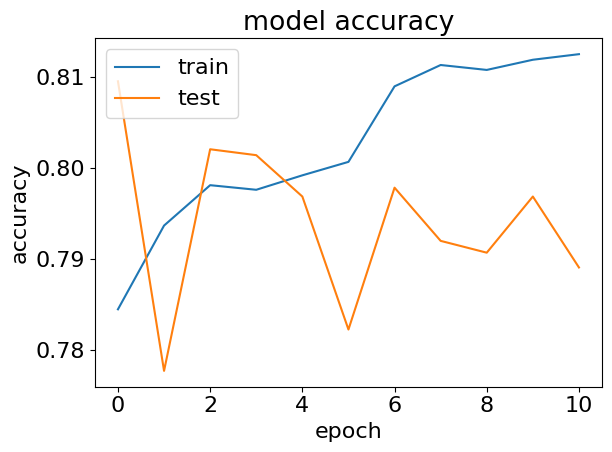

In [93]:
os.makedirs(model_folder, exist_ok=True)
plt.plot(history_dense_adjusted.history['accuracy'])
plt.plot(history_dense_adjusted.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(os.path.join(model_folder, 'model_dense_training_adjusted.png'), dpi=300, bbox_inches='tight')
plt.show()

In [94]:
model_folder = 'dense_1layer_adjusted'
checkpoint_file_fcn = os.path.join(SAVEPATH, model_folder,'checkpoint.model.keras')
model_dense_best = keras.models.load_model(checkpoint_file_fcn)

preds = model_dense_best.predict(X_val)
y_true = y_val.values.ravel()
y_pred_dense = (preds > 0.5).astype(int).ravel()

model_dense_acc = accuracy_score(y_true, y_pred_dense)
print('Validation accuracy=', model_dense_acc)

p_r_f1 = precision_recall_fscore_support(y_true, y_pred_dense, labels=[0, 1])
print('F1 scores:')
print('Average F1 score = ', np.mean([p_r_f1[2][0], p_r_f1[2][1]]))

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation accuracy= 0.8095703125
F1 scores:
Average F1 score =  0.7674815482340064


# Conclusion

Looking at our final results, we significantly improved the F1 score from 0.59 -> 0.76 and our validiation accuracy also jumped signifiacantly. The first model was much easier to train and as a very clear logarithmic curve in both the train and test data analysis. Our more complex model is a bit more varied, but the overall accuracy is much higher